# Introduction
The Dataset provides the annual water usage in Baltimore from 1885 to 1963, or 79 years of data. The values are in the units of liters per capita per day, and there are 79 observations.


# Objective
Creationg models using ARIMA to making a prediction the annual water usage in Baltimore. Follow the steps below:

## The Steps: 
1. Load the dataset as a Pandas Series and split into two, one for model development (dataset.csv) and the other for validation (validation.csv). 
2. Create summary of the dataset, with python function. 
3. Create A line plot of a time series dataset, it will provide a lot of insight into the problem. 
4. Group the annual data by decade and get an idea of the spread of observations for each decade and how this may be changing. 
5. Create models using ARIMA 
    - Split the dataset into train and test sets directly 
    - The ﬁrst 50% of the dataset will be held back to train the model.
    - The remaining 50% of the dataset will be iterated and test the model. 
    - The ARIMA(p,d,q) model requires three parameters and is traditionally conﬁgured manually. 
    - Use an ARIMA(0,1,0) on the raw data may be a good starting point. 
    - When model trained, a one-step prediction made ang the prediction stored for later evaluation. 
    - The actual observation from the test dataset woll be added to the training dataset for the next iteration. 
    - The predictions made during the enumeration of the test dataset will be evaluated and an RMSE score reported. 
6. Calculate the RMSE using the helper function from the scikit-learn library, from dataset only I. Those RMSE will show you on average, how much the error/the model was wrong/gap between predection and expected value per capita per day for each prediction made.

## Follow the Steps

#### Data Preparation 

In [138]:
# import libraries
# scipy
import scipy as  sci
from scipy.stats import boxcox

# numpy
import numpy as np

# statsmodels
import statsmodels as sml
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# scikit-learn
import sklearn as skl
from sklearn.model_selection import train_test_split

# pandas
import pandas as pd


%matplotlib inline 
import matplotlib.pyplot as plt 

### 1. Load the dataset as a Pandas Series and split into two, one for model development (dataset.csv) and the other for validation (validation.csv). 

In [23]:
# load the data
data=pd.read_csv('water.csv')

#rename column 'Baltmore city annual water use, liters per capita per day, 1885-1968' with 'Water'
data=data.rename(columns={'Baltmore city annual water use, liters per capita per day, 1885-1968':'Water'})

# split data into training set and validation set
# Dataset consists of data from 1885 to 1953
# Validaion consists of data from 1954 to 1963
dataset = data[0:len(data)-10]
validation = data[len(data)-10:]

# saving splitted data to csv
dataset.to_csv(r'C:\Users\dwilar064174\Documents\DS-Dwilaras Athina\MID TEST\Jawab Mid\Python Use Case\dataset.csv')
validation.to_csv(r'C:\Users\dwilar064174\Documents\DS-Dwilaras Athina\MID TEST\Jawab Mid\Python Use Case\validation.csv')

Data dari water.csv dibagi menjadi dua bagian. Yaitu dataset.csv dan validation.csv. Dataset.csv adalah 70 data pertama dari water.csv sedangkan validation.csv adalah 9 data terakhir yang akan menjadi validasi. Dataset.csv dan Validation.csv disimpan didalam folder dengan cara diatas. 

### 2. Create summary of the dataset, with python function

#### Exploratory Data Analysis

In [25]:
# looking for first 10 data from dataset
dataset.head(10)

,Year,Water
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413
5,1890,458
6,1891,485
7,1892,344
8,1893,390
9,1894,360


In [26]:
# Get the info from dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
Year     69 non-null int64
Water    69 non-null int64
dtypes: int64(2)
memory usage: 1.2 KB


From the info above there is no missing values in dataset

In [27]:
dataset.describe()

,Year,Water
count,69.000000,69.000000
mean,1919.000000,500.478261
std,20.062403,73.901685
min,1885.000000,344.000000
25%,1902.000000,458.000000
50%,1919.000000,492.000000
75%,1936.000000,538.000000
max,1953.000000,662.000000


Dari deskripsi diatas, ternyata jumlah air maksimal yang dipakai oleh warga Baltimore adalah 662 liters per capita per hari, dan jumlah air minimal adalah 344 liters per capita per hari. 

Text(0,0.5,'water')

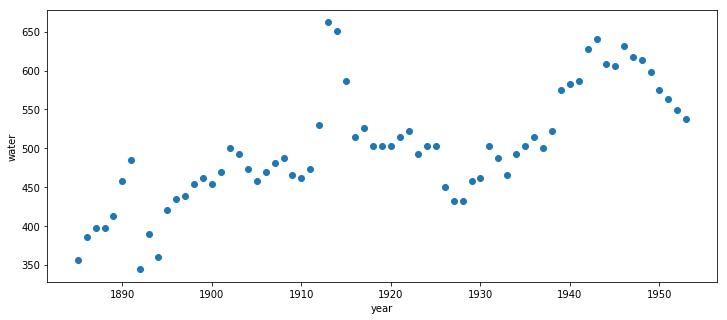

In [63]:
#making scatter plot from dataset 
X=dataset.iloc[:,0]
y=dataset.iloc[:,1]

plt.figure(figsize=(12,5))
plt.scatter(X,y)
plt.xlabel('year')
plt.ylabel('water')

Untuk memudahkan melihat penggunaan air setiap tahunnya, dan perbandingan penggunaan air dapat dilihat dari scater plot diatas. Terlihat bahwa terdapat pemakaian air yang sangat besar pada pertengahan periode 1910-1920. Lalu kembali lagi turun setelah itu. 

### 3. Create A line plot of a time series dataset, it will provide a lot of insight into the problem.

In [64]:
datasetnew = pd.read_csv('dataset.csv', parse_dates=[0], index_col=['Year'], header=0)

Disini saya menggunakan year sebagai index, lalu saya akan menghapus kolom Unnamed:0

In [66]:
datasetnew.head()

,Unnamed: 0,Water
Year,,
1885,0,356
1886,1,386
1887,2,397
1888,3,397
1889,4,413


In [71]:
#drop column Unnamed :0
datasetnew=datasetnew.drop(['Unnamed: 0'], axis=1)
datasetnew.head()

,Water
Year,
1885,356
1886,386
1887,397
1888,397
1889,413


In [196]:
# the same stages for validation data 
validation = pd.read_csv('validation.csv', parse_dates=[0], index_col=['Year'], header=0)
#drop column Unnamed :0
validationnew=validation.drop(['Unnamed: 0'], axis=1)
validationnew.head()

,Water
Year,
1954,568
1955,575
1956,579
1957,587
1958,602


### Line Plot

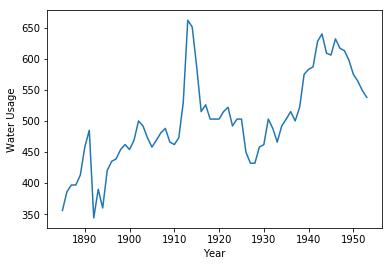

In [72]:
plt.plot(datasetnew)
plt.xlabel('Year')
plt.ylabel('Water Usage')
plt.show()

#### Analysis (Line Plot):
1. There are low and high fluctations towards the starting and somewhat at end of the data.
2. In the middle between the years 1910-1920 the fluctuation is high, seems like people in baltimore during the years 1910-1920 consumed a lot of water. I assume that the population during this time increased or might be something else.

### Density Plot

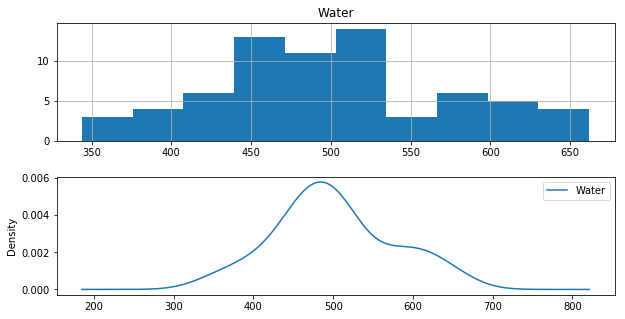

In [74]:
plt.figure(figsize=(10,5))
plt.subplot(211)
datasetnew.hist(ax=plt.gca())
plt.subplot(212)
datasetnew.plot(kind='kde', ax=plt.gca())
plt.show()

#### Analysis (Density Plot):
1. The first plot suggest that the data is close to gaussian but not perfect gaussian.
2. The second plot suggest that the data is exponential distributed and will require power transform to be applied to it.

Selain mendapatkan insight dari Line Plot, kita juga dapat melihat insight lain dari density plot, yaitu sebaran data. Dapat dikatakan data yang kita miliki menyebar normal. 

### 4. Group the annual data by decade and get an idea of the spread of observations for each decade and how this may be changing.

In [77]:
# grouping annual data by decade 
datad1=datasetnew[0:10]
datad2=datasetnew[10:20]
datad3=datasetnew[20:30]
datad4=datasetnew[30:40]
datad5=datasetnew[40:50]
datad6=datasetnew[50:60]
datad7=datasetnew[60:70]

In [79]:
# making a new column indicate the decade
datad1['decade']='1885-1894'
datad2['decade']='1895-1904'
datad3['decade']='1905-1914'
datad4['decade']='1915-1924'
datad5['decade']='1925-1934'
datad6['decade']='1935-1944'
datad7['decade']='1945-1954'


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [80]:
databoxplot=pd.concat([datad1,datad2,datad3,datad4,datad5, datad6,datad7])

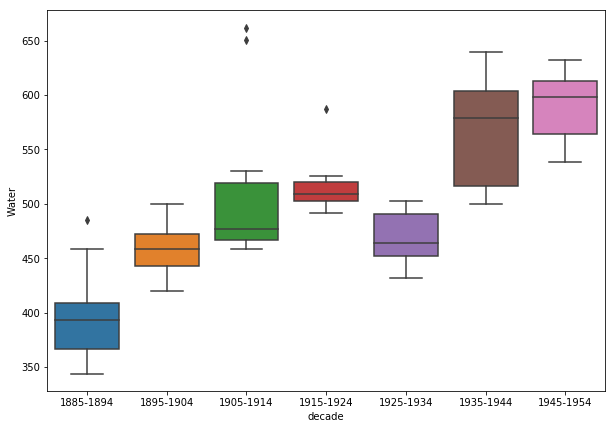

In [86]:
#making box plot from decade data 
import seaborn as sns
plt.figure(figsize=(10,7))
sns.boxplot(y=databoxplot['Water'],x=databoxplot['decade'])


**Insights** : 
- Dilihat dari box plot berdasarkan dekade,  pemakaian air naik pada 1885 - 1924. Pada rentang tersebut, terdapat pemakaian air yang sangat besar pada dekade 1905-1914. 
- Lalu, secara general pemakaian air kembali turun pada dekade 1925-1934, dan terus menaik untuk dekade selanjutnya. 

### 5. Create models using ARIMA 
    - Split the dataset into train and test sets directly 
    - The ﬁrst 50% of the dataset will be held back to train the model.
    - The remaining 50% of the dataset will be iterated and test the model. 
    - The ARIMA(p,d,q) model requires three parameters and is traditionally conﬁgured manually. 
    - Use an ARIMA(0,1,0) on the raw data may be a good starting point. 
    - When model trained, a one-step prediction made ang the prediction stored for later evaluation. 
    - The actual observation from the test dataset woll be added to the training dataset for the next iteration. 
    - The predictions made during the enumeration of the test dataset will be evaluated and an RMSE score reported. 

In [94]:
# split data into training set and validation set
# Training_data consists of data from 1885 to 1918
# Validaion_data consists of data from 1919 to 1953

train_dataset, test_dataset = datasetnew[0:len(datasetnew)-35].values, datasetnew[len(datasetnew)-35:].values

### Stationarity test

In [99]:
adf_result = adfuller(np.concatenate(datasetnew.values.astype('float32')))
print('p-value %.2f' % (adf_result[1]) )

p-value 0.18


#### Analysis (ADF test):
Following observation can be made from above p-value : <br>
Given p-value of 0.18 seems like null hypothesis is accepted meaning that the data is not stationary and ARIMA model assumes data to be stationary, lets first make it stationary and then do ADF test

In [100]:
adf_data = datasetnew.values
adf_post_diff = adfuller(np.concatenate([adf_data[i] - adf_data[i-1] for i in range(1,len(adf_data))]))
print('p-value after differencing : %.10f' % (adf_post_diff[1]))

p-value after differencing : 0.0000000859


#### Analysis (Post differencing):
Following observation can be made from above p-value : <br>
Given p-value of 0.0000000859 seems like null hypothesis is rejected meaning that the data is stationary and we can model ARIMA on it, suggesting 1-level differencing is required.

### Find AR-MA parameters of ARIMA model using ACF and PACF plot

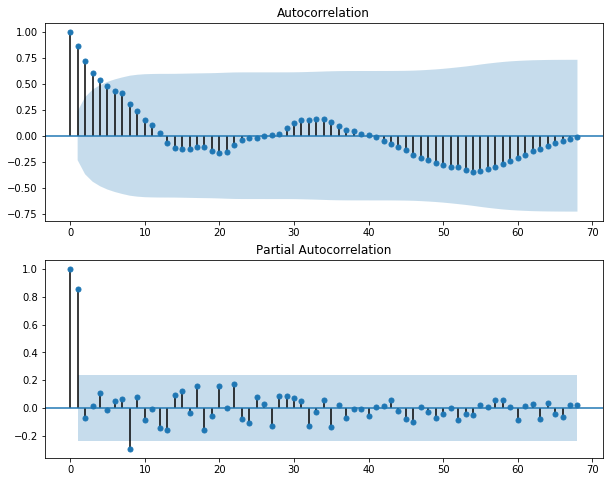

In [96]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10,8))
plt.subplot(211)
plot_acf(datasetnew, ax=plt.gca())
plt.subplot(212)
plot_pacf(datasetnew, ax=plt.gca())
plt.show()

### Analysis (ACF And PACF):

Following observations can be made from above plots : <br>

1. Dari ACF plot, kita dapatkan bahwa data kita bukanlah seasonal data. Sehingga nilai q seharusnya bukanlah 0. 
2. Dari PACF plot, nilai lag nya adalah 1 sehingga kita dapatkan nilai p=1
3. Since, from the previous differencing part we found that d=1 makes the time series stationary, hence will take value of d=1.  <br>

### Persistence Model With Walk Forward Validation (Baseline RMSE)

In [102]:
import math
from sklearn.metrics import mean_squared_error

def persistence_model(ps_tr_datanew, ps_val_datanew):
    
    history = [i for i in ps_tr_datanew]
    predictions = []
    
    for i in range(len(ps_val_datanew)):
        
        # Get predictions
        y_pred = history[-1]
        predictions.append(y_pred)
        
        #  Get actual
        history.append(ps_val_datanew[i])
        
        print('Predicted : %.2f  Actual: %.2f' % (y_pred, ps_val_datanew[i]))
        
    print('Baseline RMSE : %.2f' % (math.sqrt(mean_squared_error(ps_val_datanew, predictions))))

# Persistence model
persistence_model(train_dataset, test_dataset)

Predicted : 503.00  Actual: 503.00
Predicted : 503.00  Actual: 503.00
Predicted : 503.00  Actual: 515.00
Predicted : 515.00  Actual: 522.00
Predicted : 522.00  Actual: 492.00
Predicted : 492.00  Actual: 503.00
Predicted : 503.00  Actual: 503.00
Predicted : 503.00  Actual: 450.00
Predicted : 450.00  Actual: 432.00
Predicted : 432.00  Actual: 432.00
Predicted : 432.00  Actual: 458.00
Predicted : 458.00  Actual: 462.00
Predicted : 462.00  Actual: 503.00
Predicted : 503.00  Actual: 488.00
Predicted : 488.00  Actual: 466.00
Predicted : 466.00  Actual: 492.00
Predicted : 492.00  Actual: 503.00
Predicted : 503.00  Actual: 515.00
Predicted : 515.00  Actual: 500.00
Predicted : 500.00  Actual: 522.00
Predicted : 522.00  Actual: 575.00
Predicted : 575.00  Actual: 583.00
Predicted : 583.00  Actual: 587.00
Predicted : 587.00  Actual: 628.00
Predicted : 628.00  Actual: 640.00
Predicted : 640.00  Actual: 609.00
Predicted : 609.00  Actual: 606.00
Predicted : 606.00  Actual: 632.00
Predicted : 632.00  

### Analysis (Persistance Model):
Got RMSE value of 21.97 which will act as a baseline value for improvement of ARIMA model.

### Use an ARIMA(0,1,0)

In [112]:
train_dataset=train_dataset.astype(float);
test_dataset=test_dataset.astype(float);

In [126]:
def arima_obs(tr_ao, vl_ao, order):
    
    history = [i for i in tr_ao]
    predictions = []
    
    for i in range(len(vl_ao)):
        
        # get predictions
        fitted_model = ARIMA(history, order=order).fit(disp=0)
        y_pred = fitted_model.forecast()[0]
        predictions.append(y_pred)
        
        # append history values
        history.append(vl_ao[i])
        
        print('Predicted: %.2f Actual: %.2f' % (y_pred, vl_ao[i]))
        
    print('\nRMSE: %.2f with ARIMA%s' % (math.sqrt(mean_squared_error(vl_ao, predictions)), order))
    
    
    # RESIDUAL ANALYSIS
    print('\n\n-----------------------------------------------RESIDUAL ANALYSIS-----------------------------------------------')
    rsd = pd.DataFrame([vl_ao[i] - predictions[i] for i in range(len(vl_ao))])
    
    # plot residuals
    plt.figure(figsize=(10,20))
    
    plt.subplot(511)
    rsd.hist(ax=plt.gca())
    plt.title('Histogram')
    
    plt.subplot(512)
    rsd.plot(kind='kde', ax=plt.gca())
    plt.title('Density Plot')
    
    plt.subplot(513)
    rsd.plot(kind='line', ax=plt.gca())
    plt.title('Line plot')
    
    plt.subplot(514)
    plot_acf(rsd, ax=plt.gca())
    
    plt.subplot(515)
    plot_pacf(rsd, ax=plt.gca())
    plt.tight_layout()
    plt.show()

C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1333: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1336: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1342: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; u

Predicted: 507.45 Actual: 503.00
Predicted: 507.32 Actual: 503.00
Predicted: 507.20 Actual: 515.00
Predicted: 519.42 Actual: 522.00
Predicted: 526.49 Actual: 492.00
Predicted: 495.58 Actual: 503.00
Predicted: 506.77 Actual: 503.00
Predicted: 506.68 Actual: 450.00
Predicted: 452.29 Actual: 432.00
Predicted: 433.81 Actual: 432.00
Predicted: 433.77 Actual: 458.00
Predicted: 460.32 Actual: 462.00
Predicted: 464.36 Actual: 503.00
Predicted: 506.20 Actual: 488.00
Predicted: 490.81 Actual: 466.00
Predicted: 468.29 Actual: 492.00
Predicted: 494.78 Actual: 503.00
Predicted: 505.94 Actual: 515.00
Predicted: 518.12 Actual: 500.00
Predicted: 502.77 Actual: 522.00
Predicted: 525.13 Actual: 575.00
Predicted: 579.06 Actual: 583.00
Predicted: 587.13 Actual: 587.00
Predicted: 591.12 Actual: 628.00
Predicted: 632.77 Actual: 640.00
Predicted: 644.90 Actual: 609.00
Predicted: 613.29 Actual: 606.00
Predicted: 610.17 Actual: 632.00
Predicted: 636.52 Actual: 617.00
Predicted: 621.21 Actual: 613.00
Predicted:

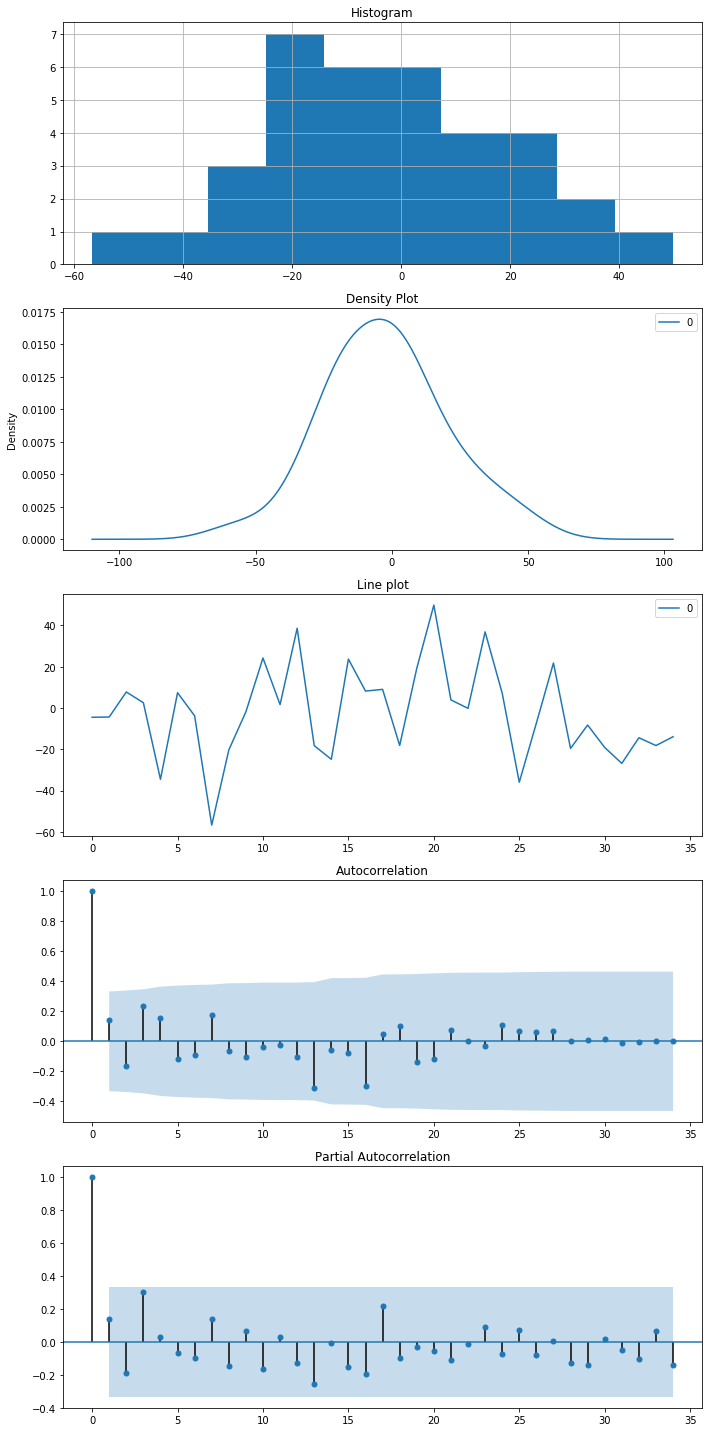

In [127]:
# ARIMA(0,1,0) performance
arima_obs(train_dataset, test_dataset, (0,1,0))

### Analysis (ARIMA(0,1,0)):
Following observation can be made from the above ARIMA(0,1,0) <br>
1- RMSE value of 22.31 seems almost the same performance as compared to persistence model <br>
2- ACF and PACF show that majority of the correlation is captured by the model. <br>
3- Observing histogram and density plots suggest applying power transform on the data to better expose the signal by removing the noise, before modelling ARIMA on the data. <br>

### Comparing Water usage predicted from ARIMA (0,1,0) and the real Water usage in Dataset

In [140]:
def inverse_boxcox(x_val, lm_val):
    
    if lm_val == 0:
        return np.exp(x_val)
    
    return np.exp(np.log(lm_val * x_val + 1) / lm_val)

In [146]:
history = [i for i in train_dataset]
prediction = list()

# walk forward validation model
for i in range(len(test_dataset)):
    
    # remove noise
    x_train , lm_val = boxcox(history)
    
    if lm_val < -5 :
        x_train , lm_val = history, 1
        
    # Fit model and get predictions
    model_fitted = ARIMA(x_train, order=(0,1,0)).fit(disp=0)
    y_pred = inverse_boxcox(model_fitted.forecast()[0], lm_val)    
    prediction.append(y_pred)
    
    # Append history
    history.append(test_dataset[i])
    
    print('Predicted: %.2f Actual: %.2f' % (y_pred, test_dataset[i]))
    
print('RMSE: %.2f' % (math.sqrt(mean_squared_error(test_dataset, prediction))))

C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:901: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2308: RuntimeWarning: invalid value encountered in true_divide
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2313: RuntimeWarning: invalid value encountered in greater
  if (w - xc) * (xb - w) > 0.0:
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2329: RuntimeWarning: invalid value encountered in greater_equal
  elif (w - wlim)*(wlim - xc) >= 0.0:
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2333: RuntimeWarning: invalid value encountered in greater
  eli

Predicted: 508.45 Actual: 503.00
Predicted: 508.65 Actual: 503.00
Predicted: 508.40 Actual: 515.00
Predicted: 520.66 Actual: 522.00
Predicted: 527.68 Actual: 492.00
Predicted: 496.33 Actual: 503.00
Predicted: 507.77 Actual: 503.00
Predicted: 507.67 Actual: 450.00
Predicted: 452.60 Actual: 432.00
Predicted: 434.02 Actual: 432.00
Predicted: 433.99 Actual: 458.00
Predicted: 460.71 Actual: 462.00
Predicted: 464.77 Actual: 503.00
Predicted: 506.91 Actual: 488.00
Predicted: 491.36 Actual: 466.00
Predicted: 469.29 Actual: 492.00
Predicted: 495.31 Actual: 503.00
Predicted: 506.51 Actual: 515.00
Predicted: 518.72 Actual: 500.00
Predicted: 503.24 Actual: 522.00
Predicted: 525.68 Actual: 575.00
Predicted: 579.93 Actual: 583.00
Predicted: 588.03 Actual: 587.00
Predicted: 592.02 Actual: 628.00
Predicted: 634.15 Actual: 640.00
Predicted: 646.58 Actual: 609.00
Predicted: 614.61 Actual: 606.00
Predicted: 611.40 Actual: 632.00
Predicted: 638.03 Actual: 617.00
Predicted: 622.51 Actual: 613.00
Predicted:

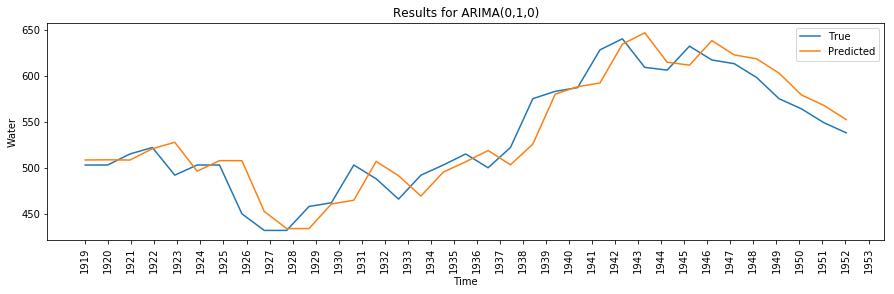

In [172]:
plt.figure(figsize=(15,4))
plt.plot(test_dataset, label='True')
plt.plot(prediction, label='Predicted')
plt.xticks(np.linspace(0, 35, 35), datasetnew[len(datasetnew)-35:].index, rotation=90 )
plt.ylabel('Water')
plt.xlabel('Time')
plt.legend()
plt.title('Results for ARIMA(0,1,0)')
plt.show()


### Use an ARIMA(5,1,0)

In [187]:
history = [i for i in train_dataset]
prediction = list()

# walk forward validation model
for i in range(len(test_dataset)):
    
    # remove noise
    x_train , lm_val = boxcox(history)
    
    if lm_val < -5 :
        x_train , lm_val = history, 1
        
    # Fit model and get predictions
    model_fitted = ARIMA(x_train, order=(5,1,0)).fit(disp=0)
    y_pred = inverse_boxcox(model_fitted.forecast()[0], lm_val)    
    prediction.append(y_pred)
    
    # Append history
    history.append(test_dataset[i])
    
    print('Predicted: %.2f Actual: %.2f' % (y_pred, test_dataset[i]))
    
print('RMSE: %.2f' % (math.sqrt(mean_squared_error(test_dataset, prediction))))

C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:901: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2308: RuntimeWarning: invalid value encountered in true_divide
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2313: RuntimeWarning: invalid value encountered in greater
  if (w - xc) * (xb - w) > 0.0:
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2329: RuntimeWarning: invalid value encountered in greater_equal
  elif (w - wlim)*(wlim - xc) >= 0.0:
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2333: RuntimeWarning: invalid value encountered in greater
  eli

Predicted: 564.85 Actual: 503.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 530.67 Actual: 503.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 521.72 Actual: 515.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 525.03 Actual: 522.00
Predicted: 529.73 Actual: 492.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 500.66 Actual: 503.00
Predicted: 509.37 Actual: 503.00
Predicted: 517.24 Actual: 450.00
Predicted: 464.84 Actual: 432.00
Predicted: 442.03 Actual: 432.00
Predicted: 450.91 Actual: 458.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 469.89 Actual: 462.00
Predicted: 466.78 Actual: 503.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 492.85 Actual: 488.00
Predicted: 486.97 Actual: 466.00
Predicted: 457.61 Actual: 492.00
Predicted: 492.90 Actual: 503.00
Predicted: 510.96 Actual: 515.00
Predicted: 512.91 Actual: 500.00
Predicted: 500.18 Actual: 522.00
Predicted: 519.23 Actual: 575.00
Predicted: 576.09 Actual: 583.00
Predicted: 577.92 Actual: 587.00
Predicted: 574.70 Actual: 628.00
Predicted: 622.65 Actual: 640.00
Predicted: 641.04 Actual: 609.00
Predicted: 608.40 Actual: 606.00
Predicted: 610.52 Actual: 632.00
Predicted: 643.77 Actual: 617.00
Predicted: 627.79 Actual: 613.00
Predicted: 618.23 Actual: 598.00
Predicted: 609.54 Actual: 575.00
Predicted: 585.94 Actual: 564.00
Predicted: 577.55 Actual: 549.00
Predicted: 562.55 Actual: 538.00
RMSE: 28.26


### Analysis (ARIMA(5,1,0)):
Following observation can be made from the above ARIMA(5,1,0) <br>
RMSE value of 28.26 seems worse performance as compared to persistence model and ARIMA (0,1,0) <br>

### Use an ARIMA(7,1,0)

In [192]:
history = [i for i in train_dataset]
prediction = list()

# walk forward validation model
for i in range(len(test_dataset)):
    
    # remove noise
    x_train , lm_val = boxcox(history)
    
    if lm_val < -5 :
        x_train , lm_val = history, 1
        
    # Fit model and get predictions
    model_fitted = ARIMA(x_train, order=(7,1,0)).fit(disp=0)
    y_pred = inverse_boxcox(model_fitted.forecast()[0], lm_val)    
    prediction.append(y_pred)
    
    # Append history
    history.append(test_dataset[i])
    
    print('Predicted: %.2f Actual: %.2f' % (y_pred, test_dataset[i]))
    
print('RMSE: %.2f' % (math.sqrt(mean_squared_error(test_dataset, prediction))))

C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:901: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2308: RuntimeWarning: invalid value encountered in true_divide
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2313: RuntimeWarning: invalid value encountered in greater
  if (w - xc) * (xb - w) > 0.0:
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2329: RuntimeWarning: invalid value encountered in greater_equal
  elif (w - wlim)*(wlim - xc) >= 0.0:
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2333: RuntimeWarning: invalid value encountered in greater
  eli

Predicted: 535.48 Actual: 503.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 531.39 Actual: 503.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 568.09 Actual: 515.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 572.25 Actual: 522.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 544.76 Actual: 492.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 506.03 Actual: 503.00
Predicted: 511.08 Actual: 503.00
Predicted: 519.83 Actual: 450.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 465.12 Actual: 432.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 444.92 Actual: 432.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 461.47 Actual: 458.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 473.24 Actual: 462.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 468.99 Actual: 503.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 502.48 Actual: 488.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 490.59 Actual: 466.00
Predicted: 455.30 Actual: 492.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 488.15 Actual: 503.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 509.28 Actual: 515.00
Predicted: 504.75 Actual: 500.00
Predicted: 502.22 Actual: 522.00
Predicted: 521.84 Actual: 575.00
Predicted: 569.86 Actual: 583.00
Predicted: 572.65 Actual: 587.00
Predicted: 569.42 Actual: 628.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 623.93 Actual: 640.00
Predicted: 633.39 Actual: 609.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 597.48 Actual: 606.00
Predicted: 611.24 Actual: 632.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 644.14 Actual: 617.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 621.48 Actual: 613.00


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted: 619.03 Actual: 598.00
Predicted: 616.44 Actual: 575.00
Predicted: 585.91 Actual: 564.00
Predicted: 575.55 Actual: 549.00
Predicted: 567.50 Actual: 538.00
RMSE: 30.86


### Analysis (ARIMA(7,1,0)):
Following observation can be made from the above ARIMA(7,1,0) <br>
RMSE value of 30.86 seems worst performance as compared to the previous models <br>

## Applying ARIMA (0,1,0) to Validation Data

In [199]:
## Making a Validation from Validation.csv
dataset = datasetnew.values
validation= validationnew.values

train_dataset=dataset.astype(float);
test_dataset=validation.astype(float);

In [200]:
history = [i for i in train_dataset]
prediction = list()

# walk forward validation model
for i in range(len(test_dataset)):
    
    # remove noise
    x_train , lm_val = boxcox(history)
    
    if lm_val < -5 :
        x_train , lm_val = history, 1
        
    # Fit model and get predictions
    model_fitted = ARIMA(x_train, order=(0,1,0)).fit(disp=0)
    y_pred = inverse_boxcox(model_fitted.forecast()[0], lm_val)    
    prediction.append(y_pred)
    
    # Append history
    history.append(test_dataset[i])
    
    print('Predicted: %.2f Actual: %.2f' % (y_pred, test_dataset[i]))
    
print('RMSE: %.2f' % (math.sqrt(mean_squared_error(test_dataset, prediction))))

Predicted: 541.04 Actual: 568.00
Predicted: 571.49 Actual: 575.00
Predicted: 578.51 Actual: 579.00
Predicted: 582.47 Actual: 587.00
Predicted: 590.49 Actual: 602.00
Predicted: 605.63 Actual: 594.00
Predicted: 597.40 Actual: 587.00
Predicted: 590.20 Actual: 587.00
Predicted: 590.11 Actual: 625.00
Predicted: 628.56 Actual: 613.00
RMSE: 16.14


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1333: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1336: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1342: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; u

Didapatkan RMSE 16.14 lebih kecil daripada train-test data sebelumnya. 

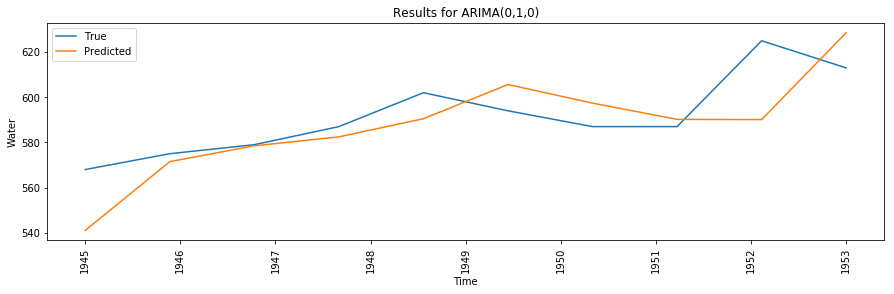

In [201]:
plt.figure(figsize=(15,4))
plt.plot(test_dataset, label='True')
plt.plot(prediction, label='Predicted')
plt.xticks(np.linspace(0, 9, 9), datasetnew[len(datasetnew)-9:].index, rotation=90 )
plt.ylabel('Water')
plt.xlabel('Time')
plt.legend()
plt.title('Results for ARIMA(0,1,0)')
plt.show()


Prediksi pemakaian air oleh warga Baltimore dapat di lihat dari pengaplikasian model ARIMA (0,1,0) dengan data validasi diatas. 

### Insights :
- Dari Analisis ARIMA diatas, RMSE paling kecil didapatkan untuk ARIMA (0,1,0). Nilai RMSE nya adalah 22.53 untuk dataset yang digunakan. 
- Kita dapat menggunakan model tersebut untuk memprediksi untuk penggunaan air pada tahun-tahun setelahnya. 
- Namun demikian, RMSE tersebut cukup besar. Pada analisis selanjutnya mungkin bisa dilakukan **GRID SEARCH ARIMA** untuk mendapatkan nilai RMSE terkecil dan dari model ARIMA yang didapatkan semakin mendekati nilai kebenaran. 